# The "Best" Neighboord?
We explore one way you could determine the so-called best neighborhood in Pittsburgh
## Introduction
Our metric measures the number of trees (who doesn't like trees?) per person against buglaries, robberies, and 311 complaints (also per capita). 311, in Pittsburgh, is a hotline where you can submit non-emergency concerns to the city. 
We figured that the number of trees in a neighborhood would offset the crimes and complaints, just because they are trees! Burglaries and Robberies aren't great, and complaints to the city are also pretty bad, but tress make everything better. In our analysis, a higher number is "better" than a lower one. We also thought about measuring Air Quality and the percentage of city-owned property in a given neighborhood, but decided that these metrics would be more fun.
## The Metrics
We measured 3 metrics as mentioned above:

### Crime (Buglaries and Robberies)
Using a [demographic dataset](https://data.wprdc.org/dataset/pgh), we calculated the number of robberies and burglaries per capita for each neighborhood. Let's visualize that data:

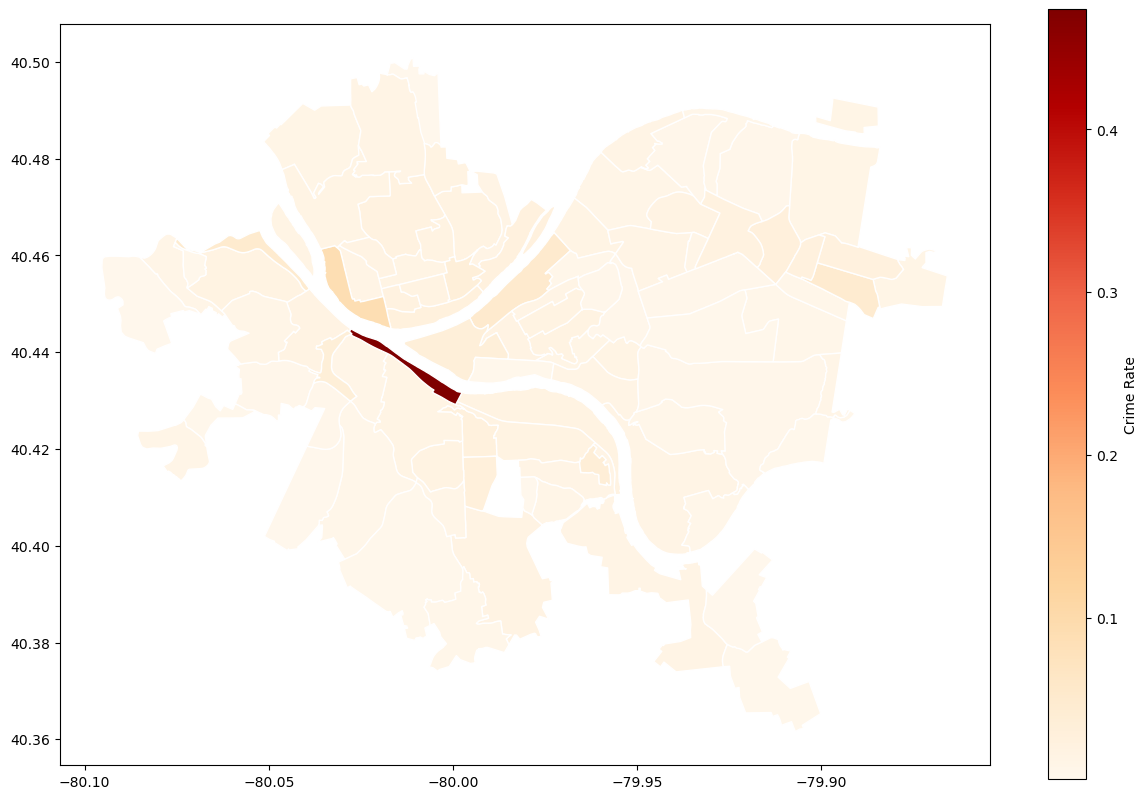

In [23]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt


# Read in our shapefiles
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# Read in our crime data (crime_pc.csv)
crime = pd.read_csv("crime_pc.csv")

crime_map = neighborhoods.merge(crime, left_on="hood", right_on="Neighborhood", how="left")
crime_map.plot(column="Crime Per Capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

Well we certainly have a "worst" neighborhood! Let's see what it looks like without that outlier:

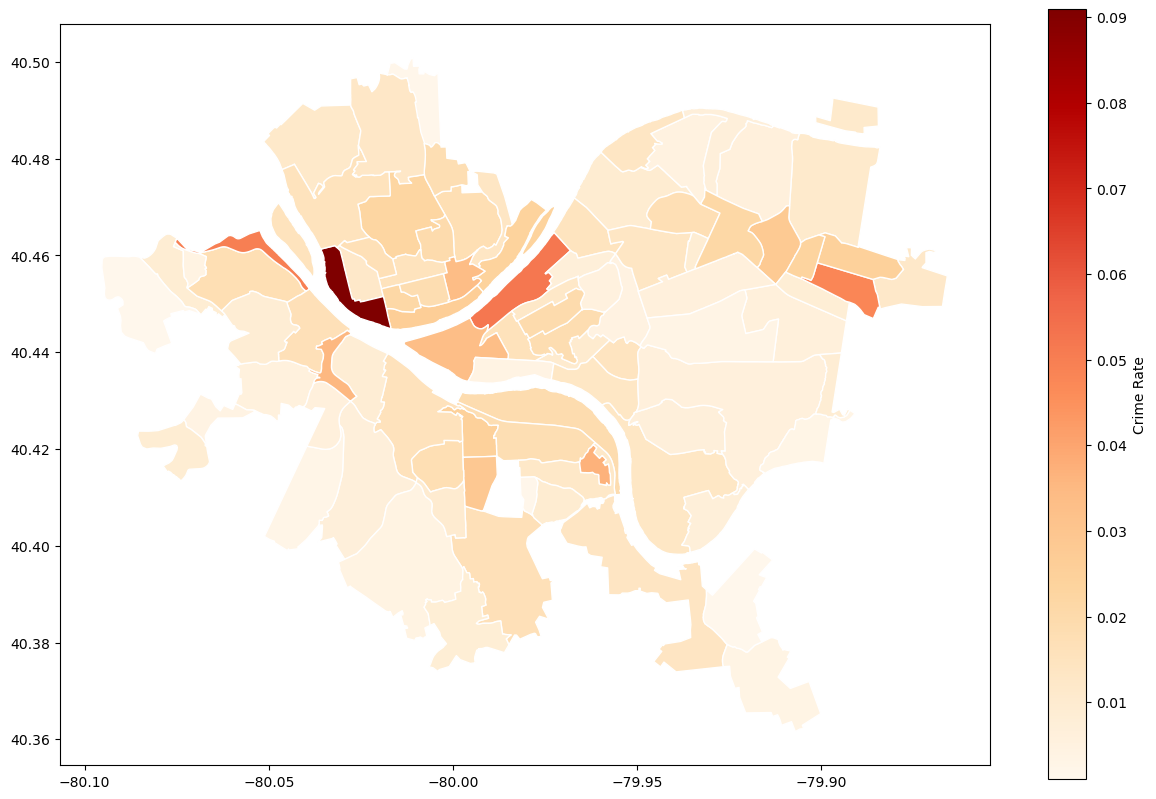

In [18]:
dropped=crime_map[crime_map["Neighborhood"] != "South Shore"]
dropped.plot(column="Crime Per Capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

That's a little more interesting looking.

## 311 Complaints
Let's look at a similar visualization for our findings with [thihttps://data.wprdc.org/dataset/311-datas]() dataset:

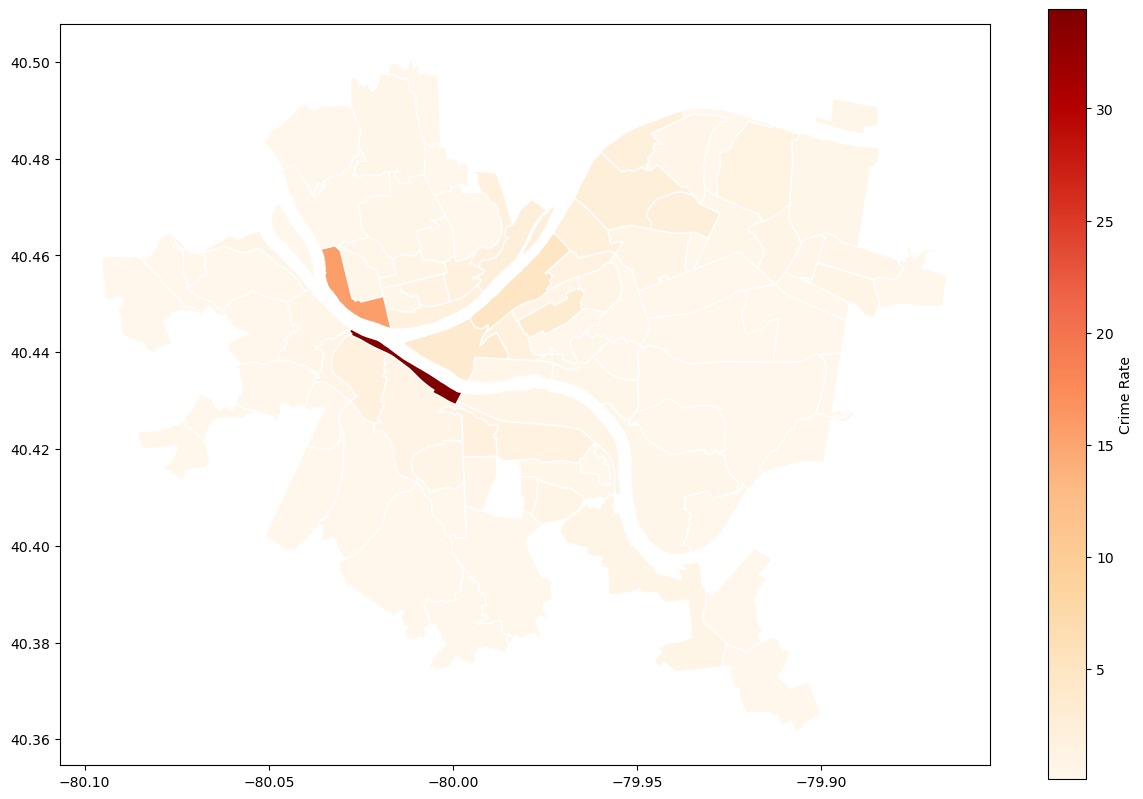

In [22]:
complaints = pd.read_csv("311_pc.csv")

complaints_map = neighborhoods.merge(complaints, left_on="hood", right_on="neighborhood", how="left")
complaints_map.plot(column="Complaints_per_capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

Alright... same problem as with South Shore. Let's do the same:

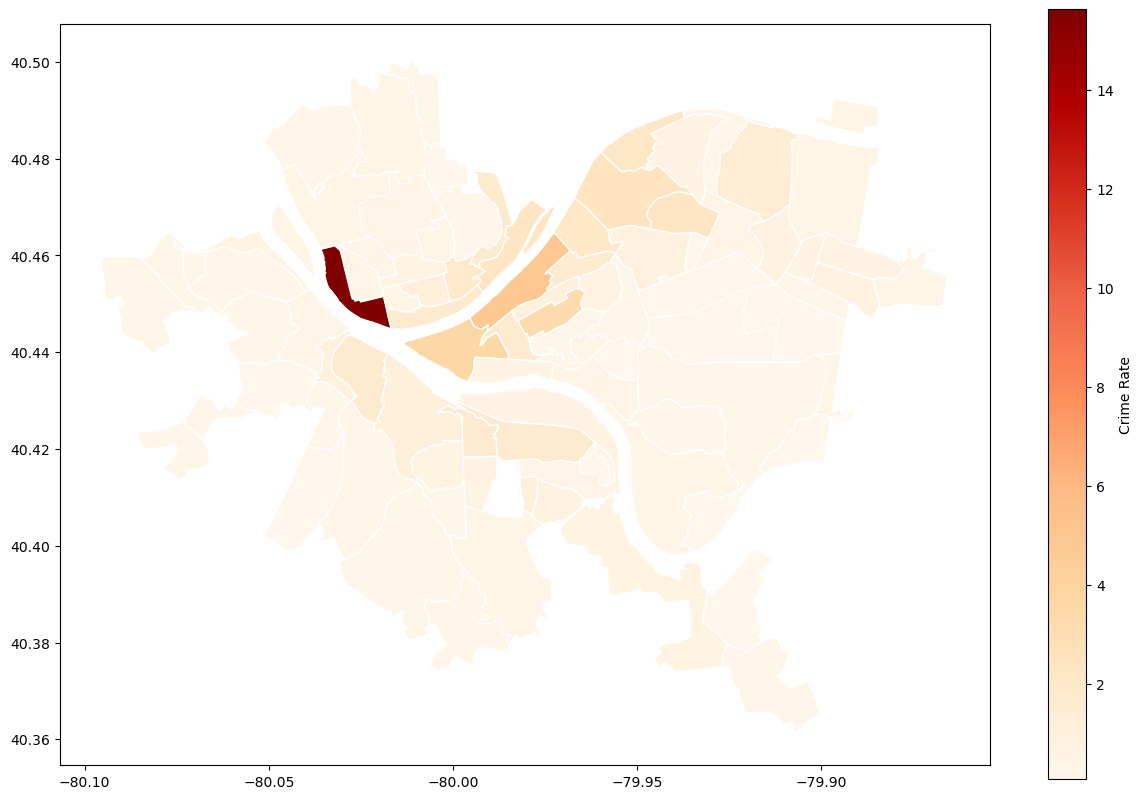

In [26]:
dropped_311=complaints_map[complaints_map["neighborhood"] != "South Shore"]
dropped_311.plot(column="Complaints_per_capita", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()

## Trees
Finally, we used [this](https://data.wprdc.org/dataset/city-trees) dataset to measure the number of trees cared for by the city.

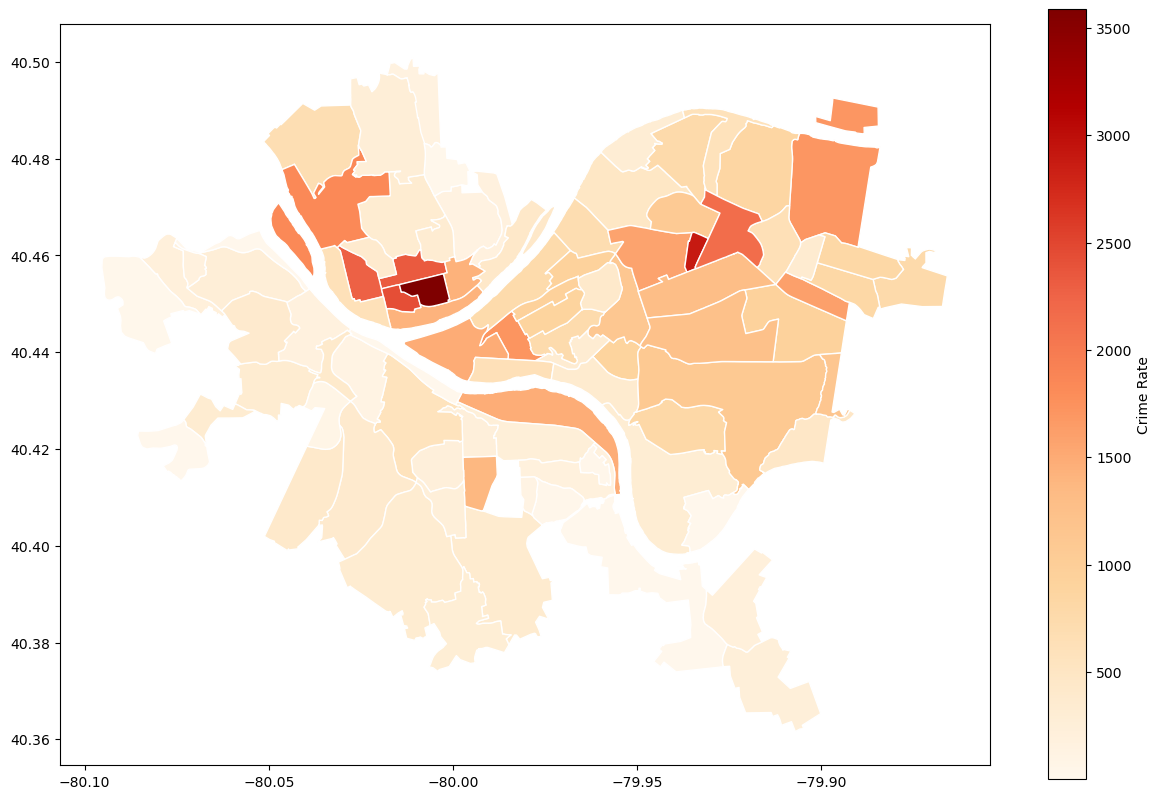

In [27]:
trees = pd.read_csv("trees_psqm.csv")

trees_map = neighborhoods.merge(trees, left_on="hood", right_on="neighborhood", how="left")
trees_map.plot(column="trees_sqmile", cmap="OrRd", edgecolor="white", legend=True, legend_kwds={'label': "Crime Rate"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})
plt.show()